# Neural Networks From Scratch

[YOUTUBE Playlist](https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3)


purpouse of ML: Take inputs and produce desired outputs

> Ex. in: Pictures of cats and dogs, out: ID of cat or dog

Using a massive amount of weights and biases and tuning them to get our correct outputs


In [1]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import nnfs
import math

# image preview import
from IPython.display import Image


## Video 1

### Creating a neuron

- Each neuron has a unique connection to every neuron before it
  - those are all providing inputs, so thats the first thing we need
  - they also each have a weight thats coming as input
- Each neuron also has a bias


In [2]:
inputs = [1.2, 5.1, 2.1]  # the inputs from three neurons in the previous layer
# the weights from three neurons in the previous layer
weights = [3.1, 2.1, 8.7]
bias = 3  # the bias of our current neuron

output = inputs[0] * weights[0] + inputs[1] * \
    weights[1] + inputs[2] * weights[2] + bias

output


35.7

## Video 2

###


In [3]:
# Renaming the values to be the ones in the book

inputs = [1, 2, 3]  # the inputs from three neurons in the previous layer
# the weights from three neurons in the previous layer
weights = [0.2, 0.8, -0.5]
bias = 2  # the bias of our current neuron

output = inputs[0] * weights[0] + inputs[1] * \
    weights[1] + inputs[2] * weights[2] + bias

output


2.3

Each of the neurons in the network has inputs weights and a specific bias as shown below


In [4]:
Image(url="./Screen Shot 2022-09-06 at 5.30.43 PM.png", width=300, height=300)


In [5]:
# adding a new input
inputs = [1, 2, 3, 2.5]
# and weight
weights = [0.2, 0.8, -0.5, 1.0]


# then recalculating with the new inputs
output = inputs[0] * weights[0] + inputs[1] * weights[1] + \
    inputs[2] * weights[2] + inputs[3] * weights[3] + bias

output


4.8

Ok thats great but what if we want to add even more neurons to the mix...

well make a network with four inputs and three outputs, (imaged below)

we already have our 4 inputs but we need more weights and biases so lets make some


In [6]:
Image(url="./Screen Shot 2022-09-06 at 6.55.24 PM.png", width=300, height=300)


In [7]:
# redefine inputs
inputs = [1, 2, 3, 2.5]


# weights
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]


# biases
bias1 = 2
bias2 = 3
bias3 = 0.5


ok thats cool for the inputs to the neuron

but now we need the output for the neurons, and since we have three neurons on the output layer we will be outputting 3 values

so lets calculate the output...


In [8]:
output = [inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
          inputs[0] * weights2[0] + inputs[1] * weights2[1] +
          inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
          inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3]

output


[4.8, 1.21, 2.385]

Ok awesome we have our three outputs from out three seperate neurons


## Video 3

Ok so now we simplify bc this is getting out of hand


In [9]:
# convert to one 2d array for weights
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

# convert biases to an array
biases = [2, 3, 0.5]


And then we will make a better way to loop through all of those elements


In [10]:
layer_outputs = []  # output of current layer
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0  # output of given neuron
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

layer_outputs


[4.8, 1.21, 2.385]

Hurray we got the same output, much cleaner too!

ok now we will look at shape

the shape of an array is the (# rows, # columns)

the more dimensions, the more numbers get added to the front


In [11]:
# the size of a is a 2 by 3 matrix or (2,3)

a = [[1, 2, 3],
     [4, 5, 6]]


# the size of b is (3,2,3)
# each number being the number of objects in that dimension

b = [[[1, 2, 3],
     [4, 5, 6]],
     [[1, 2, 3],
     [4, 5, 6]],
     [[1, 2, 3],
     [4, 5, 6]]]


the dot product is the elementwise multiplication of two vectors that all gets added together


In [12]:
# for example a * b

a = [1, 2, 3]
b = [2, 3, 4]

# dot product
dot_product = a[0] * b[0] + a[1] * b[1] + a[2] * b[2]

dot_product


20

Ok so now we will use this on our own neuron after redefining our inputs


In [13]:
# redefining inputs, weights and bias
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

# using numpy to calculate the dot product

output = np.dot(weights, inputs) + bias

output


4.8

Heres whats happening more explicitly


In [14]:
Image(url="./Screen Shot 2022-09-07 at 2.34.05 PM.png", width=500, height=50)


Currently we are only getting one output from a neuron which is a step back from earlier, but if we convert our weights back to a matrix this will still work.


In [15]:
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]


In [16]:
outputs = np.dot(weights, inputs) + bias

outputs


array([4.8  , 0.21 , 3.885])

This is because the sizes of the two matrices match

in other words, the two inner numbers are the same, in this case 4 and 4


In [17]:
inputs = np.array(inputs)
weights = np.array(weights)

print(f'{weights.shape=}, {inputs.shape=} inside elements are equal')


weights.shape=(3, 4), inputs.shape=(4,) inside elements are equal


In [18]:
# this is an easier way to do that problem also @ being the dot product
weights @ inputs + bias


array([4.8  , 0.21 , 3.885])

## Video 4

Batches, Layers, and Objects


We are using batches for a few reasons

1. Easier to parallelize use a GPU on it
2. easier to feed the neuron multiple inputs at once so it can better fit a line (for example)

so we will convert our inputs into three batches of inputs instead of a single input


In [19]:
# our inputs is now a matrix containing three batches
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]


Now that we have redifined our inputs as batches we need to check the shapes of our matrices before we can use the dot product on them


In [20]:
inputs = np.array(inputs)
weights = np.array(weights)

print(f'{weights.shape=}, {inputs.shape=} inside elements are not equal anymore')


weights.shape=(3, 4), inputs.shape=(3, 4) inside elements are not equal anymore


In [21]:
# therfore it will no longer work to use the dot product on those two matrices

try:
    inputs @ weights
except:
    print('oops cant do that')


oops cant do that


Ok so in order to use the dot product on this we have to use the transpose function which basically turns the matrix 90 degrees


In [22]:
inputs @ weights.T + biases


array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

ok so now what if we want to add another layer?

well thats pretty easy at this point

to do that we'll say that those are the outputs of our first layer, layer1


In [23]:

layer1_outputs = inputs @ weights.T + biases


And then we will create a new matrix of weights and biases for our new layer


In [24]:
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]


# and convert both of those into numpy arrays

weights2 = np.array(weights2)
biases2 = np.array(biases2)


Which we can then feed into our equasion as the new inputs and get a new layer of outputs, layer2.


In [25]:
layer2_outputs = layer1_outputs @ weights2.T + biases2

layer2_outputs


array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

Ok sweet so we have output for the most unruly multi layer neural network ever now

which is awesome but very hard to edit without a lot of work.

so what can we do to clean all of this up?

lets create some objects

but before we do that lets redifine our input values to X as they are the only thing we will be keeping.

(we are keeping the inputs because we need some data to feed to our neural network)


In [26]:
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

X = np.array(X)


Ok lets make a new class we can work with

well make a class called layer_dense that creates its weights and biases randomly when its initialized

it will also have a forward method which uses the output


In [27]:
# make sure we have the same vals as the tutorial with seed
np.random.seed(0)


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # self.output = np.dot(inputs, self.weights) + self.biases
        # or alternatively (a little cleaner)
        self.output = inputs @ self.weights + self.biases


# Create two layers
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)


# run a forward pass and feed its output into the second layer
layer1.forward(X)
layer2.forward(layer1.output)
print(layer2.output)


[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Video 5

Activation Functions in hidden layers


Activation functions sit inside each of the neurons, taking all of the inputs to the neuron and calculating their output

there are many different activation functions, for example:

### Linear

$$
\begin{split}R(z,m) = \begin{Bmatrix} z*m    \\
           \end{Bmatrix}\end{split}


$$

### sigmoid

$$
S(z) = \frac{1} {1 + e^{-z}}
$$

### RELU

$$
\begin{split}F(x) = \begin{Bmatrix} x & x > 0 \\
 0 & x <= 0 \end{Bmatrix}\end{split}
$$


In [28]:
# an example of the relu activation function

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []


for i in inputs:
    if i > 0:
        output.append(i)
    elif i <= 0:
        output.append(0)

output


[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

Ok that works great!

Lets define a class for it so we can use it later on


In [29]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


Ok now we need to initialize the nnfs package for this tutorial.

in order to generate the datasets and keep the data standardized

we will also bring in the spiral dataset generator from the nnfs package


In [30]:

from nnfs.datasets import spiral_data
nnfs.init()


we can use the nnfs package to create our spiral dataset which will generate a bunch of points

These generated points from this function falls into three classes,

this first graph has the data without the classifications into those classes

its a bit hard to tell which of these dots belongs to each class


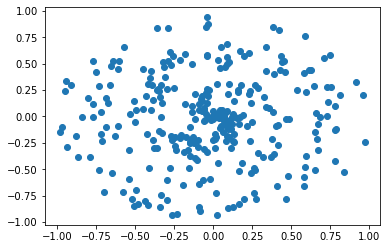

In [31]:
# visualizing the dataset

X, y = spiral_data(100, 3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()


If we colorize them the classification is clear but it would have been hard to determine without the colorization


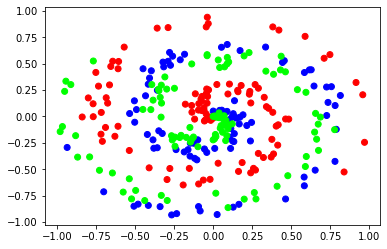

In [32]:

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()


so we will try to train our model on this data to solve this classification problem and see how well our model will handle it

ok so first well have to create our layer of neurons to feed this data into


In [33]:
# our first layer
# we use a 2 here because we are dealing with x,y coordinates in our input therfore our n_inputs is 2
layer1 = Layer_Dense(2, 5)


# then we need an activation function, in this case well use our newly created class, Activation_ReLU

activation1 = Activation_ReLU()


ok and now that we have our layer and our activation function we can run the forward pass with our data and feed that output to our activation function


In [34]:
layer1.forward(X)

# ok now layer1 has an output we can feed to our activation function

activation1.forward(layer1.output)

activation1.output


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.65504476e-04,
        4.56846319e-05],
       [0.00000000e+00, 5.93471341e-05, 0.00000000e+00, 2.03573145e-04,
        6.10024319e-04],
       ...,
       [1.13291517e-01, 0.00000000e+00, 0.00000000e+00, 8.11079666e-02,
        0.00000000e+00],
       [1.34588361e-01, 0.00000000e+00, 3.09493989e-02, 5.66337556e-02,
        0.00000000e+00],
       [1.07817926e-01, 0.00000000e+00, 0.00000000e+00, 8.72561932e-02,
        0.00000000e+00]], dtype=float32)

Ok awesome so thats how we will be using all of the classes we have created so far


## Video 6

Softmax Activation


Normalizing Values manually without numpy


In [35]:
layer_outputs = [4.8, 1.21, 2.385]

E = math.e


exp_values = []

for output in layer_outputs:
    exp_values.append(E**output)


print(exp_values)


norm_base = sum(exp_values)
norm_values = []


for value in exp_values:
    norm_values.append(value / norm_base)


print(norm_values)
print(sum(norm_values))


[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


Ok thats great but we can simplify it greatly by using numpy.


In [36]:
layer_outputs = [4.8, 1.21, 2.385]


exp_values = np.exp(layer_outputs)
print(exp_values)
norm_values = exp_values / np.sum(exp_values)

print(norm_values)
print(sum(norm_values))


[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]
0.9999999999999999


As usual, using numpy saves us a lot of lines

and this exponentiation and normalization is called the **Softmax** function

ok so now we will change our **softmax** so that it can take the input as a matrix as well as a list


In [37]:
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.02],
                 [1.41, 1.051, 0.026]]


exp_values = np.exp(layer_outputs)

norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)


print(norm_values)


[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99838561e-01 2.23170086e-05 1.39121702e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


Ok so now that we have figured out the **Softmax** lets put it into a class


In [38]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilites = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilites


Ok now that we have that defined lets make some data that we can feed into it


In [39]:
X, y = spiral_data(samples=100, classes=3)

# Create layer 1 with two inputs and three neurons
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# Create layer 2 with three inputs (because the last layer has three neurons worth of output) and three neurons
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)


dense2.forward(activation1.output)
activation2.forward(dense2.output)


activation2.output


array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333351 , 0.3333333 , 0.33333164],
       [0.333271  , 0.3333301 , 0.33339888],
       [0.33329675, 0.33330455, 0.3333987 ],
       [0.333312  , 0.33331376, 0.33337426],
       [0.3333418 , 0.33333313, 0.333325  ],
       [0.33334365, 0.33333308, 0.3333232 ],
       [0.3333453 , 0.33333308, 0.33332163],
       [0.33334798, 0.33333302, 0.333319  ],
       [0.33335003, 0.33333296, 0.333317  ],
       [0.33335102, 0.33333296, 0.33331606],
       [0.33335313, 0.3333329 , 0.33331397],
       [0.33335426, 0.33333287, 0.33331287],
       [0.33335748, 0.3333328 , 0.33330974],
       [0.33335924, 0.33333275, 0.333308  ],
       [0.3333594 , 0.33333275, 0.33330783],
       [0.33335876, 0.33333278, 0.3333085 ],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33336312, 0.33333266, 0.3333042 ],
       [0.33333904, 0.3333332 , 0.33332774],
       [0.33333924, 0.33333322, 0.3333276 ],
       [0.33336693, 0.3333326 , 0.33330053],
       [0.

# Video 7

Calculating Loss with Categorical Cross-Entropy


This is the way that you figure out how wrong your machine learning model is, to start off we will Look at the equation for **Categorical Cross Entropy**


In [40]:
Image(url="./Screen Shot 2022-09-10 at 9.41.22 PM.png", width=600, height=300)


In [41]:
'''
solving for x in the equation
e ** x = b
'''


b = 5.2

print((np.log(b)))

print(math.e ** 1.6486586255873816)


1.6486586255873816
5.199999999999999


Ok well now we know how log works, which we will be using for the **Categorical Cross Entropy** function, lets work on coding an example of **Categorical Cross Entropy** for our own model


In [42]:


# example outputs from a fictional neural net
# there are three neurons outputting from a neural net using a softmax activation function
softmax_output = [0.7, 0.1, 0.2]

# ok so now we want to use our categorical cross entropy function to calculate the loss on these outputs
# using the one-hot encoding for our answer we have the vector with three classes called target_output
target_output = [1, 0, 0]
# where the label is equal to 0 meaning the index zero is "hot" (meaning its the answer we want)


# and now we can calculate the loss using our categorical cross entropy function

loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
         math.log(softmax_output[2])*target_output[2])
print(loss)

# which is the same as

loss = -(math.log(softmax_output[0]))
print(loss)


0.35667494393873245
0.35667494393873245


Ok great so now we have our loss value, why and how is this useful?

well basically what we are doing with that whole equasion up there is this


In [43]:
print(-math.log(0.7))  # which is pretty close to our goal value of one

# ok so what happens when we put in lower values
print(-math.log(0.2))

# our value increases... and if we get closer
print(-math.log(0.99))

# our output value drops, so this will give us a good idea of how close to target we are with the output of our neural net


0.35667494393873245
1.6094379124341003
0.01005033585350145


# Video 8: Implementing Loss

Ok so again, in reality our output from our actual neural network will probably look a bit different, more like this...


In [44]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])

# if we have certain targets we are looking for, say we have the following classification system
# 0 = dog
# 1 = cat
# 2 = human
# then we can make a class targets list

class_targets = [0, 1, 1]
# ex. in the first array we are looking at index 0 (0.7), in the second we are looking at index 1 (0.5) and the third we are looking at 1 again (0.9)


# using that we can use this statement

print(softmax_outputs[[0,1,2], class_targets])


# and to make that a bit more robust we can just get the range of the length of the softmax outputs
print(softmax_outputs[range(len(softmax_outputs)), class_targets])


# ok and now we can calculate the loss by simply wrapping that in a -np.log function

print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))




[0.7 0.5 0.9]
[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]


ok awesome, thats almost perfect but we have one small problem...


the -np.log of 0 is infinite, which means that we will produce an error or at least a warning

In [45]:
a = -np.log(0)

print(a)


inf


/var/folders/f8/td8bv8fd50jggfd3hxcq6w_r0000gn/T/ipykernel_1864/926104048.py:1: RuntimeWarning: divide by zero encountered in log
  a = -np.log(0)


This will technically work, because its a warning not an error, but it will mess up our mean, bc the mean will now be infinite

one of the ways that we can get around this is by clipping all of the values by some tiny number like 1e-7 which then stops us from having inf values


ok great so lets define some more classes, first we should make a common loss class we can inherit from later

In [46]:
class Loss:
    def calculate(self, output, y):
        '''
        output: output from the model
        y: our intended target values
        '''
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

Ok and now we will make another class that inherits from this to calculate loss with categorical cross entropy

In [47]:
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        '''
        y_pred: the values that the network predicted
        y_true: the actual values that we want
        '''
        samples = len(y_pred)
        
        # this is where we clip off the infinites
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # and now we have to get the confidences
        # we may get the true values, one hot encoded or simply as an array so we have to check for both
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            
            
        negative_log = -np.log(correct_confidences)
        return negative_log
            
    

Ok so now that we have that defined lets redifine our spiral data and run this against it

In [48]:
X, y = spiral_data(samples=100, classes=3)

# Create layer 1 with two inputs and three neurons
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# Create layer 2 with three inputs (because the last layer has three neurons worth of output) and three neurons
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)


dense2.forward(activation1.output)
activation2.forward(dense2.output)


# print(activation2.output[:5])



# and now we can use our new categorical cross entropy class



loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)


print(f"{loss=}")



loss=1.0989271


Ok so now that we have calculated the loss (aka, how wrong we are about our prediction) we need find some way of adjusting our weights and biases to decrease our loss

this will be the subject of the next few videos...


# Video 9: Introducing Optimization

Ok so lets try some potentially naive ways of implementing optimization in our neural network


to begin lets generate some data

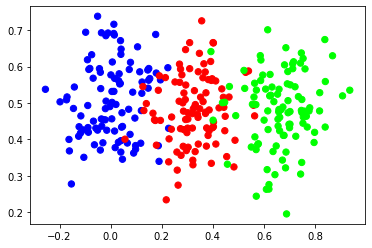

In [49]:
from nnfs.datasets import vertical_data


nnfs.init()

X, y = vertical_data(samples=100, classes = 3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

Awesome, we have some relatively simple data that could potentially be solved by just drawing some vertical lines, lets try to create a neural network and optimize it on this data.

In [50]:
# Create layer 1 with two inputs and three neurons
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# Create layer 2 with three inputs (because the last layer has three neurons worth of output) and three neurons
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()


loss_function = Loss_CategoricalCrossEntropy()

lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


num_iterations = 100000

for iteration in range(num_iterations):
    # this is how we will randomly assign weights and biases for each iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    
    # then we need to train the network on those new random weights and biases
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # then well calculate the loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print(f'New set of weights found: {iteration=} {loss=} {accuracy=}')
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss



New set of weights found: iteration=0 loss=1.0986564 accuracy=0.3333333333333333
New set of weights found: iteration=3 loss=1.098138 accuracy=0.3333333333333333
New set of weights found: iteration=117 loss=1.0980115 accuracy=0.3333333333333333
New set of weights found: iteration=124 loss=1.0977516 accuracy=0.6
New set of weights found: iteration=165 loss=1.097571 accuracy=0.3333333333333333
New set of weights found: iteration=552 loss=1.0974693 accuracy=0.34
New set of weights found: iteration=778 loss=1.0968257 accuracy=0.3333333333333333
New set of weights found: iteration=4307 loss=1.0965533 accuracy=0.3333333333333333
New set of weights found: iteration=4615 loss=1.0964499 accuracy=0.3333333333333333
New set of weights found: iteration=9450 loss=1.0964295 accuracy=0.3333333333333333
New set of weights found: iteration=13361 loss=1.0963014 accuracy=0.3333333333333333
New set of weights found: iteration=14001 loss=1.0959858 accuracy=0.3333333333333333
New set of weights found: iterat

As we can see, the loss decreases very slowly with this method, and the accutacy does not increase at all

so lets try a bit of a smarter method

instead of making fully new random weights and biases every time, we can try to tweak the values that we already know

In [51]:
# Create layer 1 with two inputs and three neurons
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# Create layer 2 with three inputs (because the last layer has three neurons worth of output) and three neurons
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()


loss_function = Loss_CategoricalCrossEntropy()

lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


num_iterations = 100000

for iteration in range(num_iterations):
    # this is how we will randomly assign weights and biases for each iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # then we need to train the network on those new random weights and biases
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # then well calculate the loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print(f'New set of weights found: {iteration=} {loss=} {accuracy=}')
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss
        
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()



New set of weights found: iteration=0 loss=1.0990679 accuracy=0.3333333333333333
New set of weights found: iteration=14 loss=1.0988022 accuracy=0.3333333333333333
New set of weights found: iteration=17 loss=1.0966319 accuracy=0.6533333333333333
New set of weights found: iteration=18 loss=1.0965811 accuracy=0.3333333333333333
New set of weights found: iteration=19 loss=1.0940638 accuracy=0.3333333333333333
New set of weights found: iteration=20 loss=1.0934975 accuracy=0.36
New set of weights found: iteration=21 loss=1.090643 accuracy=0.3333333333333333
New set of weights found: iteration=27 loss=1.0807947 accuracy=0.37333333333333335
New set of weights found: iteration=29 loss=1.0802002 accuracy=0.38
New set of weights found: iteration=32 loss=1.0645545 accuracy=0.33666666666666667
New set of weights found: iteration=36 loss=1.0632961 accuracy=0.38
New set of weights found: iteration=37 loss=1.0611253 accuracy=0.63
New set of weights found: iteration=38 loss=1.0538154 accuracy=0.5633333

As we can see this method improves on the training significantly

so is that it, have we just found a really easy way to train models?


well... no not exactly

lets see what happens when its not run on simple data that neatly fits into three groups, but instead on more complex spiral data

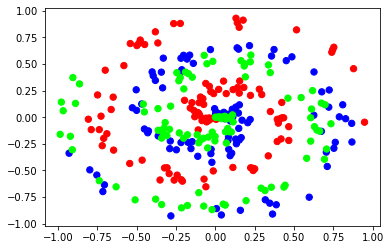

In [52]:
# get the new spiral data
X, y = spiral_data(samples=100, classes = 3)

# display it
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [53]:
# Create layer 1 with two inputs and three neurons
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# Create layer 2 with three inputs (because the last layer has three neurons worth of output) and three neurons
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()


loss_function = Loss_CategoricalCrossEntropy()

lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


num_iterations = 100000

for iteration in range(num_iterations):
    # this is how we will randomly assign weights and biases for each iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # then we need to train the network on those new random weights and biases
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # then well calculate the loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print(f'New set of weights found: {iteration=} {loss=} {accuracy=}')
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss
        
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()



New set of weights found: iteration=0 loss=1.0986902 accuracy=0.3333333333333333
New set of weights found: iteration=7 loss=1.0984832 accuracy=0.3333333333333333
New set of weights found: iteration=12 loss=1.0974274 accuracy=0.3333333333333333
New set of weights found: iteration=17 loss=1.0971342 accuracy=0.3933333333333333
New set of weights found: iteration=23 loss=1.0963839 accuracy=0.4166666666666667
New set of weights found: iteration=26 loss=1.0954869 accuracy=0.3933333333333333
New set of weights found: iteration=29 loss=1.0953835 accuracy=0.38333333333333336
New set of weights found: iteration=30 loss=1.0943676 accuracy=0.39
New set of weights found: iteration=40 loss=1.093958 accuracy=0.35
New set of weights found: iteration=50 loss=1.09303 accuracy=0.39
New set of weights found: iteration=51 loss=1.0924406 accuracy=0.4166666666666667
New set of weights found: iteration=57 loss=1.0919123 accuracy=0.36666666666666664
New set of weights found: iteration=58 loss=1.0912153 accurac

As we can see the accuracy for this model isnt even at 50% after 100,000 iterations and the loss is still pretty high

added to that, this dataset isnt even very complex as far as the usual datasets fed into machine learning models go

so now we turn to calculus...